# Data Cleaning and Translation

In [1]:
import pandas as pd
from IPython.display import Image

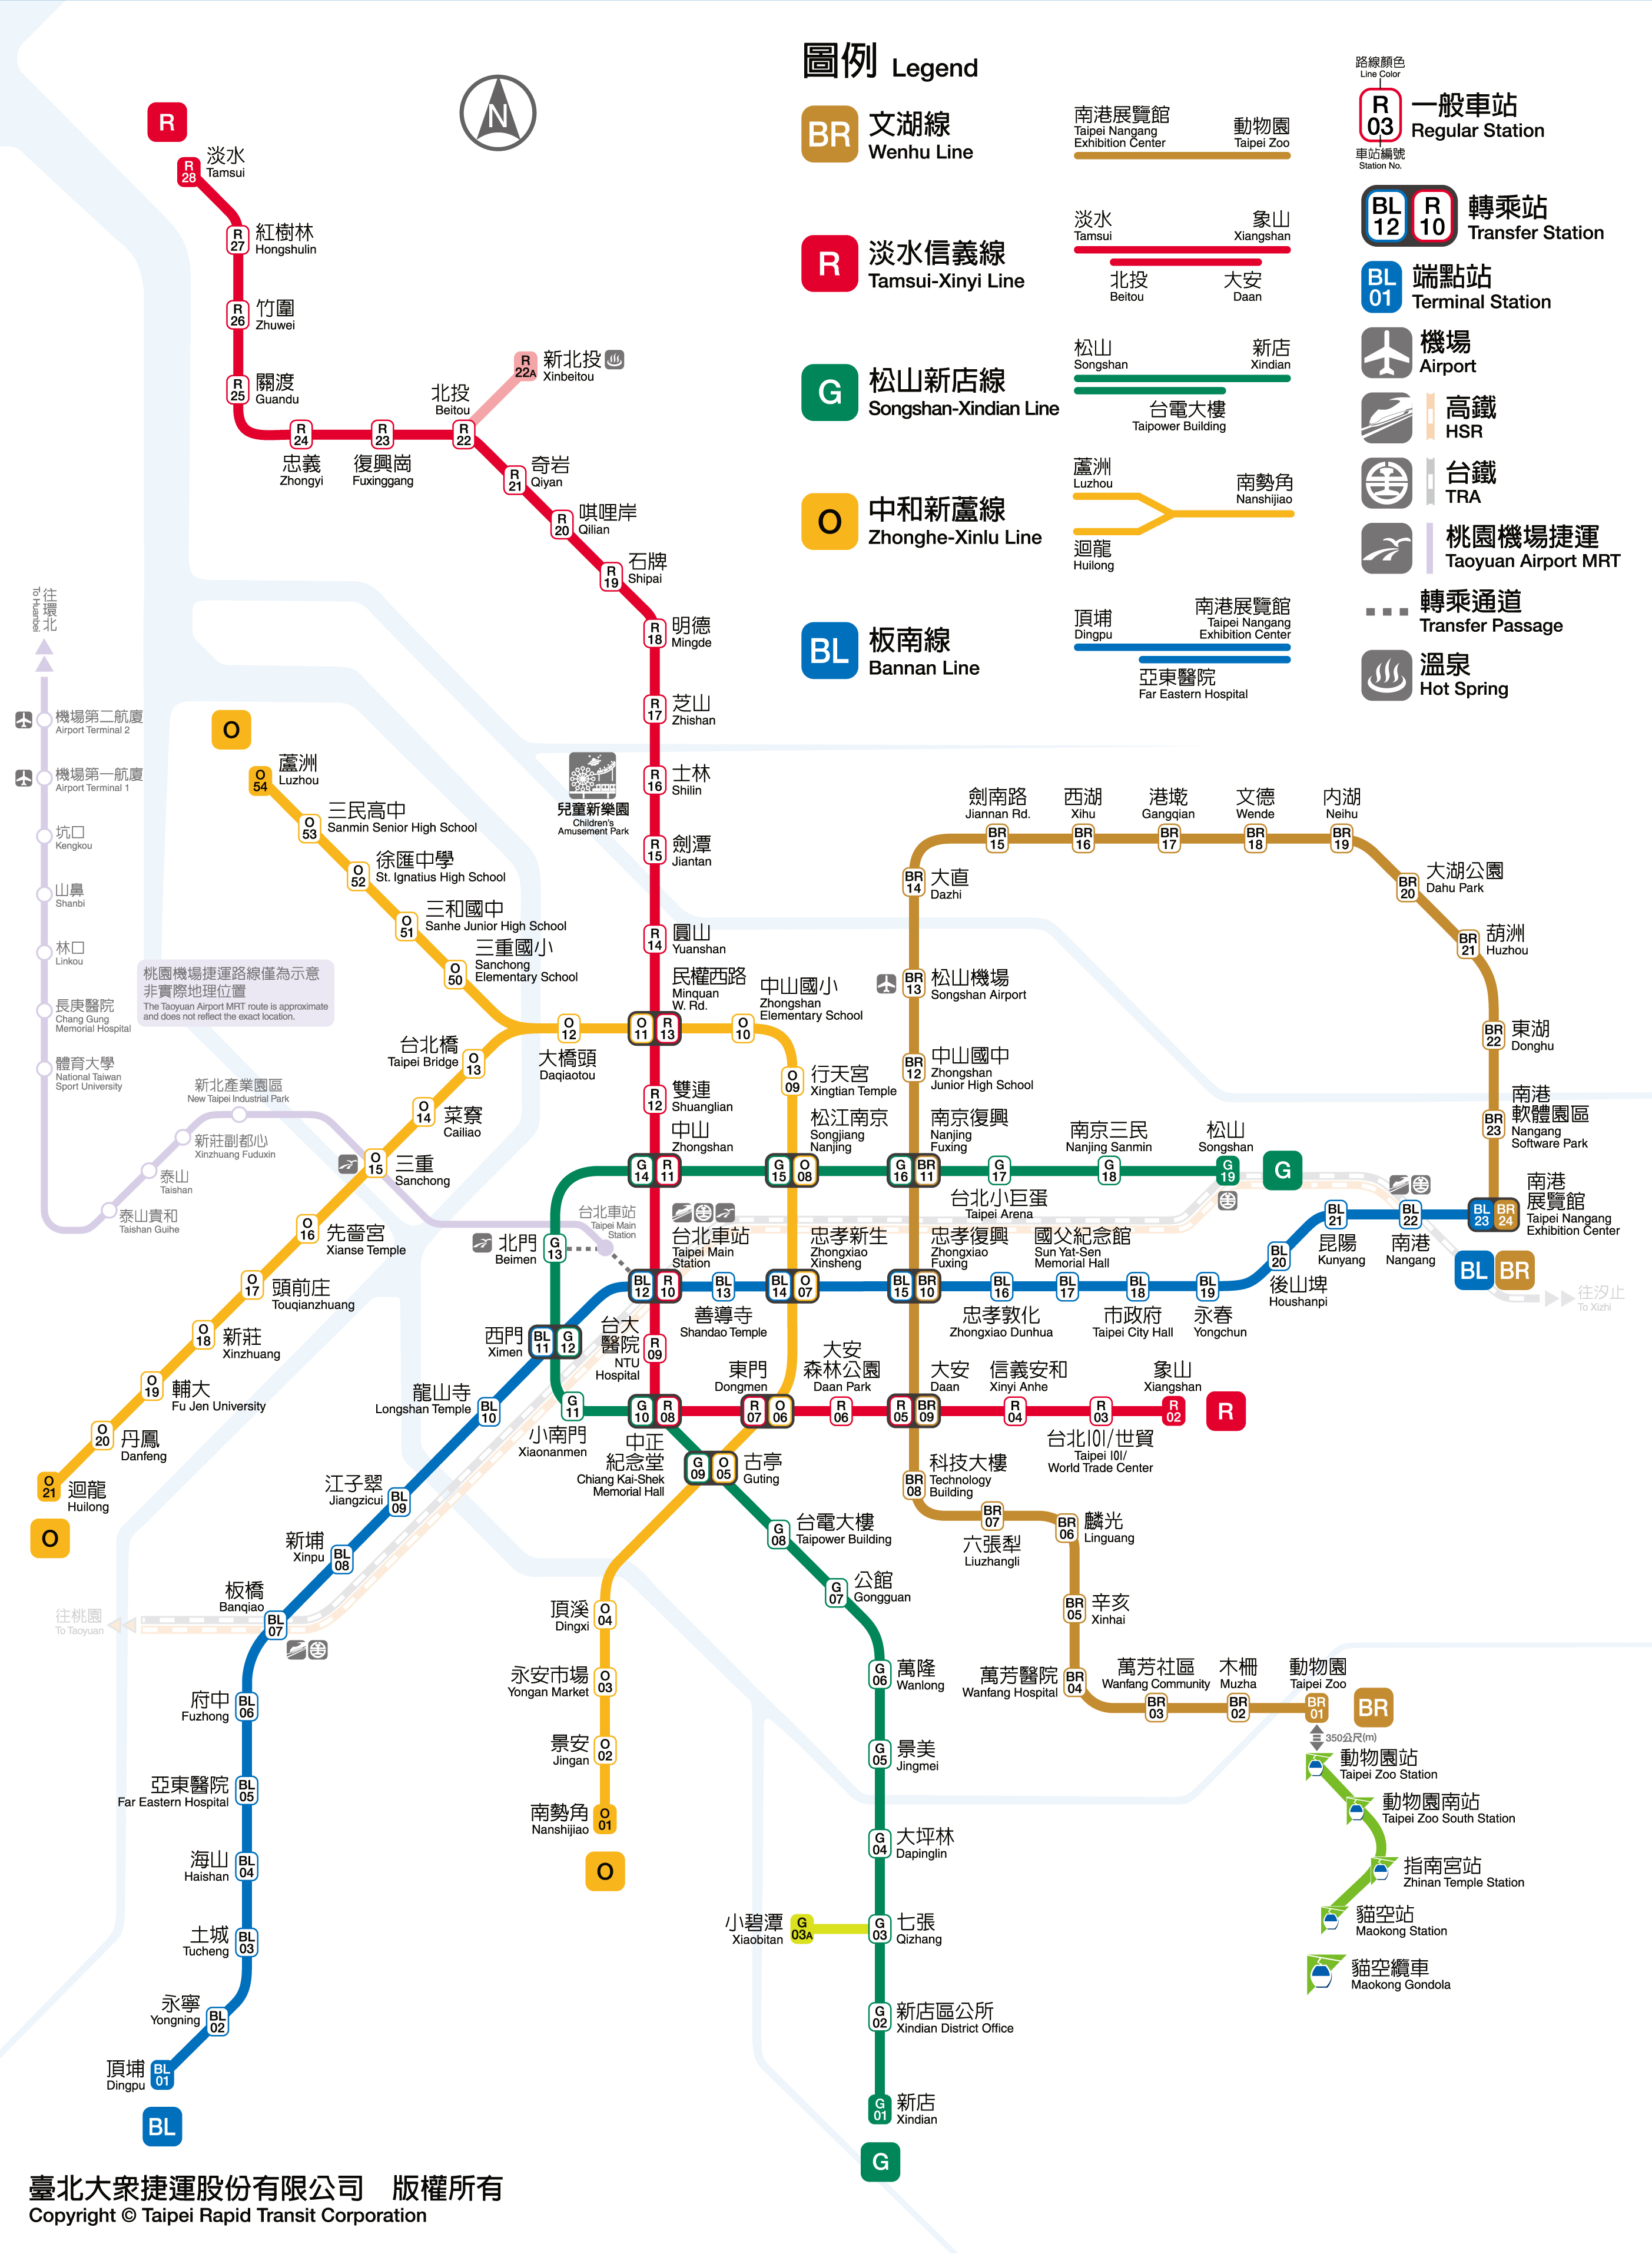

In [2]:
Image(filename='taipei-metro-map.jpg') 

In [3]:
df = pd.read_csv("taipei-metro-link-travel-time.csv")
df.head()

,line,stationA,stationB,traveltime,id,stoptime_A
0,淡水-象山,捷運淡水站,捷運紅樹林站,175,1,0
1,淡水-象山,捷運紅樹林站,捷運竹圍站,136,2,25
2,淡水-象山,捷運竹圍站,捷運關渡站,145,3,25
3,淡水-象山,捷運關渡站,捷運忠義站,78,4,25
4,淡水-象山,捷運忠義站,捷運復興崗站,109,5,25


In [4]:
# remove redundant characters
df["stationA"] = df["stationA"].str.replace("捷運", "")
df["stationA"] = df["stationA"].str.replace("站", "")
df["stationB"] = df["stationB"].str.replace("捷運", "")
df["stationB"] = df["stationB"].str.replace("站", "")
df.head()

,line,stationA,stationB,traveltime,id,stoptime_A
0,淡水-象山,淡水,紅樹林,175,1,0
1,淡水-象山,紅樹林,竹圍,136,2,25
2,淡水-象山,竹圍,關渡,145,3,25
3,淡水-象山,關渡,忠義,78,4,25
4,淡水-象山,忠義,復興崗,109,5,25


In [5]:
df.line.unique()

array(['淡水-象山', '北投-大安', '松山-新店', '松山-台電大樓', '七張-小碧潭', '北投-新北投',
       '南港展覽館-頂埔', '南港展覽館-亞東醫院', '動物園-南港展覽館', '南勢角-蘆洲', '南勢角-迴龍'],
      dtype=object)

In [6]:
# create a dictionary for line name mapping
### s: short-turn route
### f: feeder route
### O1, O2: branch routes of Orange line
line_dict = {'淡水-象山':'R',
             '北投-大安':'Rs',
             '松山-新店':'G',
             '松山-台電大樓':'Gs',
             '七張-小碧潭':'Gf',
             '北投-新北投':'Rf',
             '南港展覽館-頂埔':'BL',
             '南港展覽館-亞東醫院':'BLs',
             '動物園-南港展覽館':'BR',
             '南勢角-蘆洲':'O2',
             '南勢角-迴龍':'O1'}

In [8]:
# create a dictionary for station name mapping
df2 = pd.read_csv("taipei-metro-station-id.csv")

station_dict = dict(zip(df2['name_ch'], df2['station_id']))

In [9]:
# map line and stations to ids
df.replace({"line":line_dict,
             "stationA":station_dict,
             "stationB":station_dict}, inplace=True)
df.head()

,line,stationA,stationB,traveltime,id,stoptime_A
0,R,R28,R27,175,1,0
1,R,R27,R26,136,2,25
2,R,R26,R25,145,3,25
3,R,R25,R24,78,4,25
4,R,R24,R23,109,5,25


In [ ]:
# save to new file
# df.to_csv("output.csv")

In [3]:
# df = pd.read_csv("TPEOD_201803.csv", sep='\s+', index_col=0, skiprows=[1,7593266,7593268])
# df.tail()

,時段,進站,出站,人次
日期,,,,
2018-03-31,23,丹鳳,徐匯中學,1
2018-03-31,23,丹鳳,三和國中,1
2018-03-31,23,丹鳳,三重國小,4
2018-03-31,23,丹鳳,迴龍,3
2018-03-31,23,丹鳳,丹鳳,1


In [4]:
# df[(df["進站"] == "忠孝復興") & (df["出站"] == "台北車站")]

,時段,進站,出站,人次
日期,,,,
2018-03-01,0,忠孝復興,台北車站,8
2018-03-01,1,忠孝復興,台北車站,0
2018-03-01,5,忠孝復興,台北車站,0
2018-03-01,6,忠孝復興,台北車站,43
2018-03-01,7,忠孝復興,台北車站,78
2018-03-01,8,忠孝復興,台北車站,108
2018-03-01,9,忠孝復興,台北車站,95
2018-03-01,10,忠孝復興,台北車站,106
2018-03-01,11,忠孝復興,台北車站,120
